## Técnicas en Opencv

TAREAS: 

1. Realiza distintas fotografías en clase y utilizando el detector de bordes Canny que nos facilita OpenCV prueba si se detectan correctamente los objetos. Prueba también con varios objetos como monedas, tornillos,... para probar si puedes contarlos. Puedes utilizar como ayuda el siguiente documento.

2. Haz una foto en clase con varios compañeros y prueba a detectar los rostros utilizando el clasificador Haar Cascade que está incorporado en OpenCV.

### Ralphy Núñez Mercado

### Imports 

In [263]:
import cv2
import matplotlib.pyplot as plt

### Parte 1


### Primero cargamos y pasamos la imagen a gris 

In [264]:
imagePath = 'fotos/IMG_6971.jpg'

imagen = cv2.imread(imagePath)

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)



### Filtro Guassiano para eliminar el ruido en la imagen 


In [265]:
gaussiana = cv2.GaussianBlur(gris, (7,7), 0)



### Detectamos los bordes con Canny

In [266]:

canny = cv2.Canny(gaussiana, 50, 150)
 
 

In [ ]:

imagen = cv2.resize(imagen, (1080, 720))
gris = cv2.resize(gris, (1080, 720))   
gaussiana = cv2.resize(gaussiana, (1080, 720)) 
canny = cv2.resize(canny, (1080, 720)) 




cv2.imshow("orignal", imagen)
cv2.waitKey(0)
cv2.imshow("gris", gris)
cv2.waitKey(0)
cv2.imshow("suavizado", gaussiana)
cv2.waitKey(0)

cv2.imshow("canny", canny)
cv2.waitKey(0)


-1

### Buscamos los contornos

In [268]:
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


### Mostramos el número de monedas por consola

In [269]:
print("He encontrado {} objetos".format(len(contornos)))

cv2.drawContours(imagen,contornos,-1,(0,0,255), 2)
cv2.imshow("contornos", imagen)
cv2.waitKey(0)

He encontrado 621 objetos


-1

In [270]:
# import cv2
 
# # Read the original image
# img = cv2.imread('fotos/IMG_6971.jpg') 
# img = cv2.resize(img, (1080, 720))

# # Display original image
# cv2.imshow('Original', img)
# cv2.waitKey(0)
 
# # Convert to graycsale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Blur the image for better edge detection
# img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# # Sobel Edge Detection
# sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
# sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# # Display Sobel Edge Detection Images
# cv2.imshow('Sobel X', sobelx)
# cv2.waitKey(0)
# cv2.imshow('Sobel Y', sobely)
# cv2.waitKey(0)
# cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
# cv2.waitKey(0)
 
# # Canny Edge Detection
# edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# # Display Canny Edge Detection Image
# cv2.imshow('Canny Edge Detection', edges)


# cv2.waitKey(0)
 
# cv2.destroyAllWindows()

# (contornos,_) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print("He encontrado {} objetos".format(len(contornos)))

### Parte 2 

Paso 1: importar el paquete OpenCV

In [271]:
imagePath = 'fotos/IMG_6916.jpg'

Paso 2: leer la imagen

In [272]:
img = cv2.imread(imagePath)

img.shape

(4032, 3024, 3)

Paso 3: convertir la imagen a escala de grises

In [273]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


Paso 4: cargar el clasificador

In [274]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Paso 5: realizar la detección facial

In [275]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Paso 6: dibujar un cuadro delimitador

In [276]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 12)

Paso 7: visualizar la imagen

In [277]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

visualizar la imagen 

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

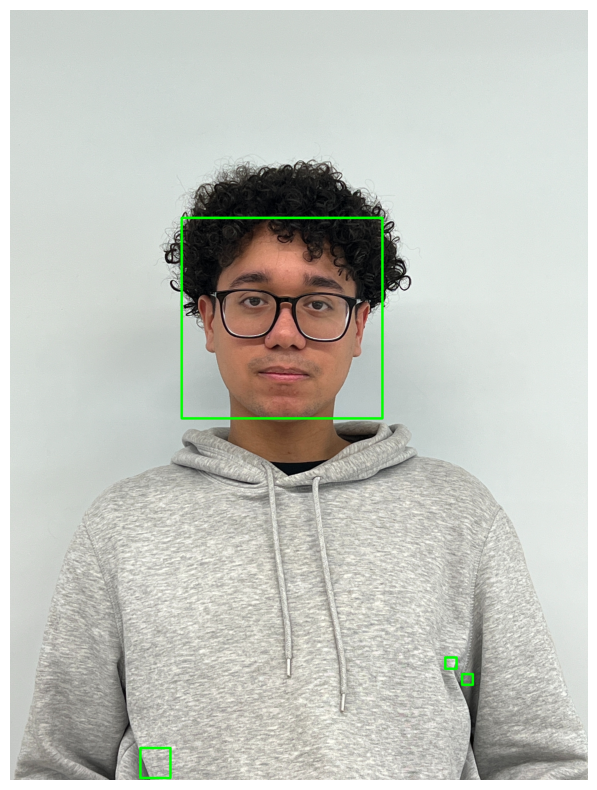

In [278]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

Como podemos ver en en la primera imagen tiene falsos positivos, para ellos cambiamose el número de vecinos, en este caso, los aumentamos a 6.

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

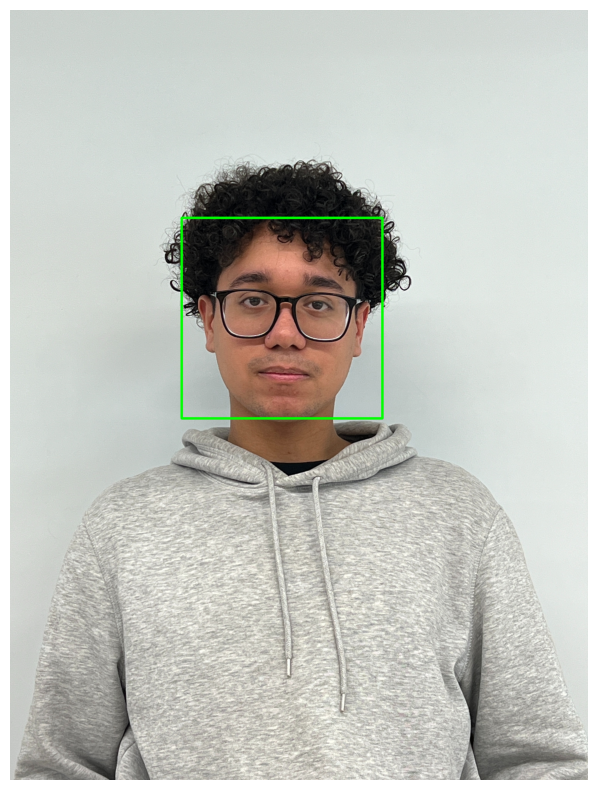

In [279]:

img = cv2.imread(imagePath)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=6, minSize=(40, 40)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 12)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
